# Introduction to Machine Learning (CSCI-UA.473)

## Lab 5: PyTorch (Tensors and Autograd) and Neural Networks
### Date: October 21st, 2021
### Name: (your name goes here)
### Email: (your NYU email goes here)

### Goal:  Demonstrate two foundational modules of PyTorch (a popular machine learning library) and how to use it to build and train neural networks for regression and classification tasks. 

The contents of this lab is borrowed from the examples provided as part of the PyTorch tutorial: https://github.com/pytorch/examples


## What is PyTorch?

It’s a Python based scientific computing package targeted at two sets of audiences:

-  Tensorial library that uses the power of GPUs
-  A deep learning research platform that provides maximum flexibility and speed

In this class though we will not use any GPU based computation since most of the work (labs and assignments) will be done on your laptops. 

## Import the library

In [3]:
import torch  # <Ctrl> / <Shift> + <Return>

## Getting help in Jupyter
PyTorch offers some helpful functionalities when working with Jupyter. 

In [5]:
torch.sqrt  # <Tab>

<function _VariableFunctionsClass.sqrt>

In [4]:
# What about all `*Tensor`s?
# Press <esc> to get out of help
torch.*Tensor?

torch.BFloat16Tensor
torch.BoolTensor
torch.ByteTensor
torch.CharTensor
torch.DoubleTensor
torch.FloatTensor
torch.HalfTensor
torch.IntTensor
torch.LongTensor
torch.ShortTensor
torch.Tensor

In [7]:
torch.nn.Module()  # <Shift>+<Tab>

Module()

In [5]:
# Annotate your functions / classes!
torch.nn.Module?

Init signature: torch.nn.Module() -> None
Docstring:     
Base class for all neural network modules.

Your models should also subclass this class.

Modules can also contain other Modules, allowing to nest them in
a tree structure. You can assign the submodules as regular attributes::

    import torch.nn as nn
    import torch.nn.functional as F

    class Model(nn.Module):
        def __init__(self):
            super(Model, self).__init__()
            self.conv1 = nn.Conv2d(1, 20, 5)
            self.conv2 = nn.Conv2d(20, 20, 5)

        def forward(self, x):
            x = F.relu(self.conv1(x))
            return F.relu(self.conv2(x))

Submodules assigned in this way will be registered, and will have their
parameters converted too when you call :meth:`to`, etc.

:ivar training: Boolean represents whether this module is in training or
                evaluation mode.
:vartype training: bool
Init docstring: Initializes internal Module state, shared by both nn.Module and ScriptModule

In [6]:
# Twice gives you the source code!
torch.nn.Module??

Init signature: torch.nn.Module() -> None
Source:        
class Module:
    r"""Base class for all neural network modules.

    Your models should also subclass this class.

    Modules can also contain other Modules, allowing to nest them in
    a tree structure. You can assign the submodules as regular attributes::

        import torch.nn as nn
        import torch.nn.functional as F

        class Model(nn.Module):
            def __init__(self):
                super(Model, self).__init__()
                self.conv1 = nn.Conv2d(1, 20, 5)
                self.conv2 = nn.Conv2d(20, 20, 5)

            def forward(self, x):
                x = F.relu(self.conv1(x))
                return F.relu(self.conv2(x))

    Submodules assigned in this way will be registered, and will have their
    parameters converted too when you call :meth:`to`, etc.

    :ivar training: Boolean represents whether this module is in training or
                    evaluation mode.
    :vartype training: boo

## Dropping to Bash: magic!

In [10]:
# List all the files in the current directory
!ls -lh

total 1.6M
-rw-r--r-- 1 jkker jkker   51 Sep 23 14:22 foo.p
-rwxr-xr-x 1 jkker jkker 454K Sep 23 14:22 lab1_introduction.ipynb
-rw-r--r-- 1 jkker jkker 319K Sep 29 22:20 lab2_logisticregression.ipynb
-rw-r--r-- 1 jkker jkker 548K Oct 10 17:07 lab3_probability_bayes.ipynb
-rw-r--r-- 1 jkker jkker 254K Oct 14 14:58 lab4_mclass_and_svm.ipynb
-rw-r--r-- 1 jkker jkker  44K Oct 21 14:37 lab5_tensors_autograd_nns.ipynb
-rw-r--r-- 1 jkker jkker 4.3K Oct 21 15:03 plot_lib.py


In [11]:
%%bash
# List all the files but with cleaner outputs for readability
for f in $(ls *.*); do
    echo $(wc -l $f)
done

0 foo.p
971 lab1_introduction.ipynb
995 lab2_logisticregression.ipynb
895 lab3_probability_bayes.ipynb
1900 lab4_mclass_and_svm.ipynb
3658 lab5_tensors_autograd_nns.ipynb
140 plot_lib.py


In [12]:
# Getting some general help
%magic


IPython's 'magic' functions

The magic function system provides a series of functions which allow you to
control the behavior of IPython itself, plus a lot of system-type
features. There are two kinds of magics, line-oriented and cell-oriented.

Line magics are prefixed with the % character and work much like OS
command-line calls: they get as an argument the rest of the line, where
arguments are passed without parentheses or quotes.  For example, this will
time the given statement::

        %timeit range(1000)

Cell magics are prefixed with a double %%, and they are functions that get as
an argument not only the rest of the line, but also the lines below it in a
separate argument.  These magics are called with two arguments: the rest of the
call line and the body of the cell, consisting of the lines below the first.
For example::

        %%timeit x = numpy.random.randn((100, 100))
        numpy.linalg.svd(x)

will time the execution of the numpy svd routine, running the assignment 

## The Torch Package

In [13]:
# Generate a tensor of size 2x3x4
t = torch.Tensor(2, 3, 4)
type(t)

torch.Tensor

In [14]:
# Get the size of the tensor
print(t.size())

torch.Size([2, 3, 4])


In [15]:
# t.size() is a classic tuple =>
print('t size:', ' \u00D7 '.join(map(str, t.size())))

t size: 2 × 3 × 4


In [16]:
# prints dimensional space and sub-dimensions
print(f'point in a {t.numel()} dimensional space')
print(f'organised in {t.dim()} sub-dimensions')

point in a 24 dimensional space
organised in 3 sub-dimensions


In [17]:
t

tensor([[[1.5766e-19, 1.0256e-08, 6.4456e-10, 3.0442e+12],
         [6.7748e-10, 4.2254e-05, 1.6803e-04, 1.2752e+16],
         [2.1707e-18, 7.0952e+22, 1.7748e+28, 1.8176e+31]],

        [[7.2708e+31, 5.0778e+31, 3.2608e-12, 1.7728e+28],
         [7.0367e+22, 2.1715e-18, 3.3090e-09, 8.3084e-10],
         [4.2013e-05, 1.7183e-04, 1.6536e-04, 1.0358e-11]]])

In [18]:
# Mind the underscore!
# Any operation that mutates a tensor in-place is post-fixed with an _.
# For example: x.copy_(y), x.t_(), x.random_(n) will change x.
t.random_(10)

tensor([[[3., 8., 6., 5.],
         [1., 4., 9., 5.],
         [8., 9., 0., 7.]],

        [[4., 3., 2., 1.],
         [6., 9., 1., 8.],
         [7., 1., 9., 9.]]])

In [19]:
t

tensor([[[3., 8., 6., 5.],
         [1., 4., 9., 5.],
         [8., 9., 0., 7.]],

        [[4., 3., 2., 1.],
         [6., 9., 1., 8.],
         [7., 1., 9., 9.]]])

In [20]:
# This resizes the tensor permanently 
r = torch.Tensor(t)
r.resize_(3, 8)
r

tensor([[3., 8., 6., 5., 1., 4., 9., 5.],
        [8., 9., 0., 7., 4., 3., 2., 1.],
        [6., 9., 1., 8., 7., 1., 9., 9.]])

In [21]:
# As you can see zero_ would replace r with 0's which was originally filled with integers
r.zero_()

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [22]:
t

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [23]:
# This *is* important, sigh...
s = r.clone()

In [24]:
# In-place fill of 1's
s.fill_(1)
s

tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [25]:
# Because we cloned r, even though we did an in-place operation, this doesn't affect r
r

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

### Vectors (1D Tensors)

In [26]:
# Creates a 1D tensor of integers 1 to 4
v = torch.Tensor([1, 2, 3, 4])
v

tensor([1., 2., 3., 4.])

In [27]:
# Print number of dimensions (1D) and size of tensor
print(f'dim: {v.dim()}, size: {v.size()[0]}')

dim: 1, size: 4


In [28]:
w = torch.Tensor([1, 0, 2, 0])
w

tensor([1., 0., 2., 0.])

In [29]:
# Element-wise multiplication
v * w

tensor([1., 0., 6., 0.])

In [30]:
# Scalar product: 1*1 + 2*0 + 3*2 + 4*0
v @ w

tensor(7.)

In [31]:
# In-place replacement of random number from 0 to 10
x = torch.Tensor(5).random_(10)
x

tensor([9., 6., 1., 5., 0.])

In [32]:
print(f'first: {x[0]}, last: {x[-1]}')

first: 9.0, last: 0.0


In [33]:
# Extract sub-Tensor [from:to)
x[1:2 + 1]

tensor([6., 1.])

In [34]:
v

tensor([1., 2., 3., 4.])

In [35]:
# Create a tensor with integers ranging from 1 to 5, excluding 5
v = torch.arange(1, 4 + 1)
v

tensor([1, 2, 3, 4])

In [36]:
# Square all elements in the tensor
print(v.pow(2), v)

tensor([ 1,  4,  9, 16]) tensor([1, 2, 3, 4])


### Matrices (2D Tensors)

In [37]:
# Create a 2x4 tensor
m = torch.Tensor([[2, 5, 3, 7],
                  [4, 2, 1, 9]])
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [38]:
m.dim()

2

In [39]:
print(m.size(0), m.size(1), m.size(), sep=' -- ')

2 -- 4 -- torch.Size([2, 4])


In [40]:
# Returns the total number of elements, hence num-el (number of elements)
m.numel()

8

In [41]:
# Indexing row 0, column 2 (0-indexed)
m[0][2]

tensor(3.)

In [42]:
# Indexing row 0, column 2 (0-indexed)
m[0, 2]

tensor(3.)

In [43]:
# Indexing column 1, all rows (returns size 2)
m[:, 1]

tensor([5., 2.])

In [44]:
# Indexes row 0, all columns (returns 1x4)
m[[0], :]

tensor([[2., 5., 3., 7.]])

In [45]:
# Indexes row 0, all columns (returns size 4)
m[0, :]

tensor([2., 5., 3., 7.])

In [46]:
# Create tensor of numbers from 1 to 5 (excluding 5)
v = torch.arange(1., 4 + 1)
v

tensor([1., 2., 3., 4.])

In [47]:
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [48]:
# Dot product
m @ v

tensor([49., 47.])

In [49]:
# Calculated by 1*2 + 2*5 + 3*3 + 4*7
m[[0], :] @ v

tensor([49.])

In [50]:
# Calculated by 
m[[1], :] @ v

tensor([47.])

In [51]:
# Add a random tensor of size 2x4 to m
m + torch.rand(2, 4)

tensor([[2.2197, 5.6954, 3.0270, 7.9676],
        [4.8358, 2.4152, 1.7972, 9.3280]])

In [52]:
# Subtract a random tensor of size 2x4 to m
m - torch.rand(2, 4)

tensor([[1.3469, 4.7380, 2.2387, 6.9866],
        [3.9899, 1.2217, 0.0184, 8.1751]])

In [53]:
# Multiply a random tensor of size 2x4 to m
m * torch.rand(2, 4)

tensor([[1.8686, 3.9389, 0.9880, 3.0916],
        [2.3819, 0.8972, 0.1150, 4.5198]])

In [54]:
# Divide m by a random tensor of size 2x4
m / torch.rand(2, 4)

tensor([[ 2.1518,  6.0367,  8.1689, 31.5842],
        [21.4717,  2.0702,  1.5332, 11.4370]])

In [55]:
m.size()

torch.Size([2, 4])

In [56]:
# Transpose tensor m, which is essentially 2x4 to 4x2
m.t()

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

In [57]:
# Same as
m.transpose(0, 1)

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

### Constructors

In [58]:
# Create tensor from 3 to 8, with each having a space of 1
torch.arange(3., 8 + 1)

tensor([3., 4., 5., 6., 7., 8.])

In [59]:
# Create tensor from 5.7 to -2.1 with each having a space of -3
torch.arange(5.7, -2.1, -3)

tensor([ 5.7000,  2.7000, -0.3000])

In [60]:
# returns a 1D tensor of steps equally spaced points between start=3, end=8 and steps=20
torch.linspace(3, 8, 20).view(1, -1)

tensor([[3.0000, 3.2632, 3.5263, 3.7895, 4.0526, 4.3158, 4.5789, 4.8421, 5.1053,
         5.3684, 5.6316, 5.8947, 6.1579, 6.4211, 6.6842, 6.9474, 7.2105, 7.4737,
         7.7368, 8.0000]])

In [61]:
# Create a tensor filled with 0's
torch.zeros(3, 5)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [62]:
# Create a tensor filled with 1's
torch.ones(3, 2, 5)

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])

In [63]:
# Create a tensor with the diagonal filled with 1
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [64]:
# Set default plots
from plot_lib import set_default
from matplotlib import pyplot as plt
set_default()

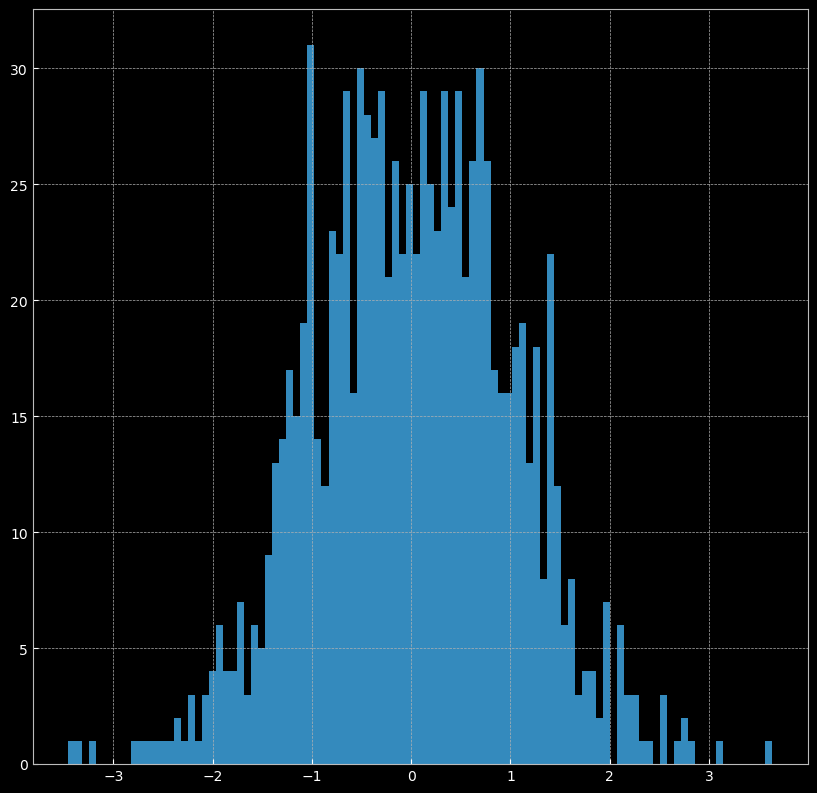

In [65]:
# Numpy bridge!
plt.hist(torch.randn(1000).numpy(), 100);

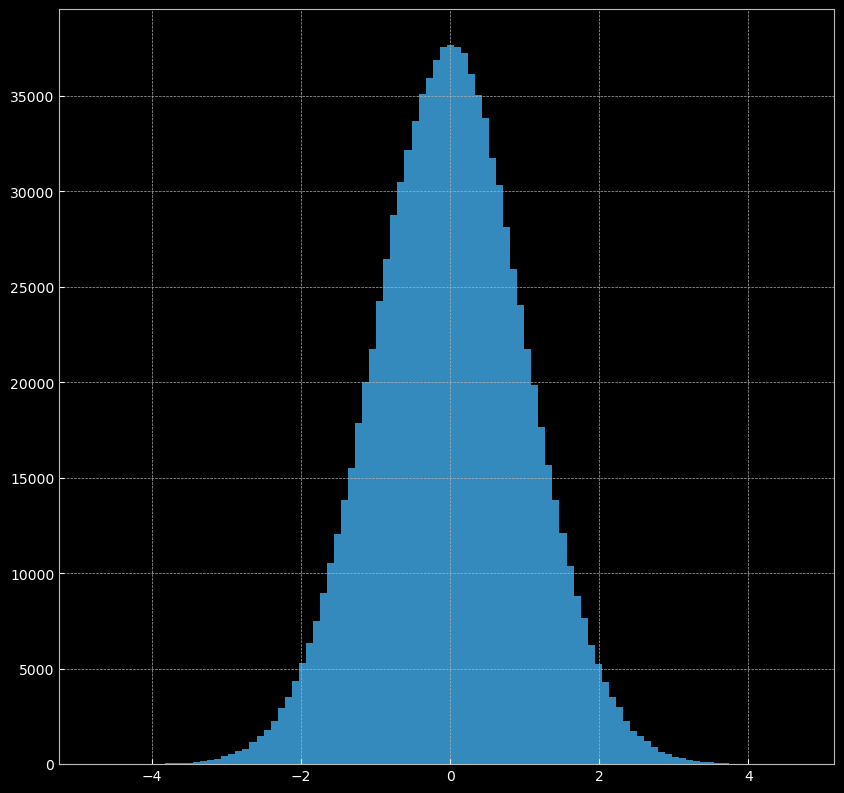

In [66]:
plt.hist(torch.randn(10**6).numpy(), 100);  # how much does this chart weight?
# use rasterized=True for SVG/EPS/PDF!

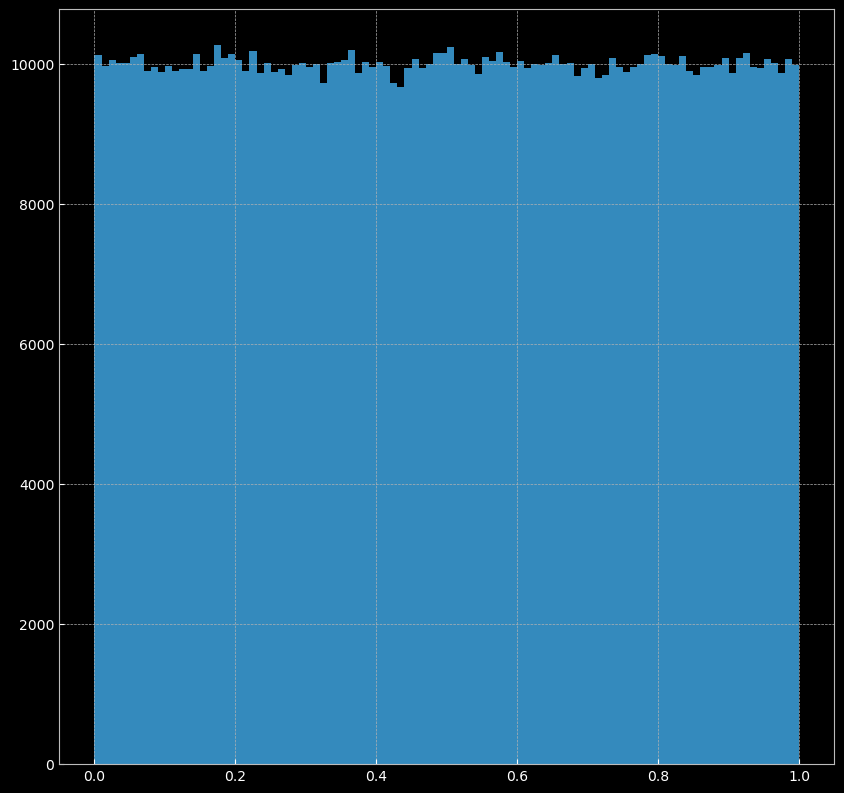

In [67]:
plt.hist(torch.rand(10**6).numpy(), 100);

### Casting

In [68]:
# Helper to get what kind of tensor types
torch.*Tensor?

torch.BFloat16Tensor
torch.BoolTensor
torch.ByteTensor
torch.CharTensor
torch.DoubleTensor
torch.FloatTensor
torch.HalfTensor
torch.IntTensor
torch.LongTensor
torch.ShortTensor
torch.Tensor

In [69]:
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [70]:
# This is basically a 64 bit float tensor
m_double = m.double()
m_double

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]], dtype=torch.float64)

In [71]:
# This creates a tensor of type int8
m_byte = m.byte()
m_byte

tensor([[2, 5, 3, 7],
        [4, 2, 1, 9]], dtype=torch.uint8)

# Using GPU

GPU Tensor & CPU Tensors are not compatible with each other
GPU better at computation
Use CPU to process data & only train on GPU
Move back to CPU for visualization

In [72]:
# Move your tensor to GPU device 0 if there is one (first GPU in the system)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
m.to(device)

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]], device='cuda:0')

In [73]:
# Converts tensor to numpy array
m_np = m.numpy()
m_np

array([[2., 5., 3., 7.],
       [4., 2., 1., 9.]], dtype=float32)

In [74]:
# In-place fill of column 0 and row 0 with value -1
m_np[0, 0] = -1
m_np

array([[-1.,  5.,  3.,  7.],
       [ 4.,  2.,  1.,  9.]], dtype=float32)

In [75]:
m

tensor([[-1.,  5.,  3.,  7.],
        [ 4.,  2.,  1.,  9.]])

In [76]:
# Create a tensor of integers ranging from 0 to 4
import numpy as np
n_np = np.arange(5)
n = torch.from_numpy(n_np)
print(n_np, n)

[0 1 2 3 4] tensor([0, 1, 2, 3, 4])


In [77]:
# In-place multiplication of all elements by 2 for tensor n
# Because n is essentially n_np, not a clone, this affects n_np
n.mul_(2)
n_np

array([0, 2, 4, 6, 8])

### Other Tensor Operations

In [78]:
# Creates two tensor of size 1x4
a = torch.Tensor([[1, 2, 3, 4]])
b = torch.Tensor([[5, 6, 7, 8]])
print(a.size(), b)

torch.Size([1, 4]) tensor([[5., 6., 7., 8.]])


In [79]:
# Concatenate on axis 0, so you get 2x4
torch.cat((a, b), 0)

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]])

In [80]:
# Concatenate on axis 1, so you get 1x8
torch.cat((a, b), 1)

tensor([[1., 2., 3., 4., 5., 6., 7., 8.]])

### More Documentation

We just had an overview of Tensors and what we can do with them. There's definitely much more to it though. 

*Torch* full API should be read at least once.
Hence, go [here](https://pytorch.org/docs/stable/index.html).
You'll find 100+ `Tensor` operations, including transposing, indexing, slicing, mathematical operations, linear algebra, random numbers, etc are described.

## The Autograd Package
The ``autograd`` package provides automatic differentiation for all operations on Tensors. It is a define-by-run framework, which means that your backprop is defined by how your code is run, and that every single iteration can be
different.

Create a tensor and do an operation on it

❗ Why Tensors: keeps track of all computations performed -> creates a computation graph

In [81]:
# Create a 2x2 tensor with gradient-accumulation capabilities
x = torch.tensor([[1, 2], [3, 4]], requires_grad=True, dtype=torch.float32)
print(x)

# do an operation on it (deduct 2 from all its elements)
# Deduct 2 from all elements
y = x - 2
print(y)

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)
tensor([[-1.,  0.],
        [ 1.,  2.]], grad_fn=<SubBackward0>)


The tensor `y` was created as a result of an operation, so it has a `grad_fn` function associated with it

In [82]:
print(y.grad_fn)

In [83]:
# What's happening here?
print(x.grad_fn)

None


In [84]:
# Let's dig further...
y.grad_fn

In [85]:
y.grad_fn.next_functions

((<AccumulateGrad at 0x7f105c7e8ca0>, 0), (None, 0))

In [86]:
y.grad_fn.next_functions[0][0].variable

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)

In [87]:
# Do more operations on y
z = y * y * 3
a = z.mean()  # average

print(z)
print(a)

tensor([[ 3.,  0.],
        [ 3., 12.]], grad_fn=<MulBackward0>)
tensor(4.5000, grad_fn=<MeanBackward0>)


### The Gradients
Let's backprop now out.backward() is equivalent to doing out.backward(torch.tensor([1.0]))

In [88]:
# Backprop
a.backward()

Print gradients $\frac{\text{d}a}{\text{d}x}$.

In [89]:
# Compute it by hand BEFORE executing this
print(x.grad)

tensor([[-1.5000,  0.0000],
        [ 1.5000,  3.0000]])


You can do many crazy things with autograd!
> With Great *Flexibility* Comes Great Responsibility

In [90]:
# Dynamic graphs!
x = torch.randn(3, requires_grad=True)

y = x * 2
i = 0
while y.data.norm() < 1000:
    y = y * 2
    i += 1
print(y)

tensor([-230.6860, -874.0029, -892.1899], grad_fn=<MulBackward0>)


In [91]:
# If we don't run backward on a scalar we need to specify the grad_output
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)

print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


### Inference

In [92]:
# This variable decides the tensor's range below
n = 3

In [93]:
# Both x and w that allows gradient accumulation
x = torch.arange(1., n + 1, requires_grad=True)
w = torch.ones(n, requires_grad=True)
z = w @ x
z.backward()
print(x.grad, w.grad, sep='\n')

tensor([1., 1., 1.])
tensor([1., 2., 3.])


In [94]:
# Only w that allows gradient accumulation
x = torch.arange(1., n + 1)
w = torch.ones(n, requires_grad=True)
z = w @ x
z.backward()
print(x.grad, w.grad, sep='\n')

None
tensor([1., 2., 3.])


In [95]:
x = torch.arange(1., n + 1)
w = torch.ones(n, requires_grad=True)

# Regardless of what you do in this context, all torch tensors will not have gradient accumulation
with torch.no_grad():
    z = w @ x

try:
    z.backward()  # PyTorch will throw an error here, since z has no grad accum.
except RuntimeError as e:
    print('RuntimeError!!! >:[')
    print(e)

RuntimeError!!! >:[
element 0 of tensors does not require grad and does not have a grad_fn


### More stuff

Again there's lot more to autograd. Documentation of the package can be found at: 
http://pytorch.org/docs/autograd.

## Classification of non-linearly separable dataset using multi-layer perceptron
We will not demonstrate how to build a linear model and a neural network model using PyTorch and how to train it to classify a toy dataset which is not linearly separable. 

Import appropriate packages

In [96]:
import random
import torch
from torch import nn, optim
import math
from IPython import display

In [97]:
# some predefined helper functions provided for plotting data and model outputs
from plot_lib import plot_data, plot_model, set_default

In [98]:
set_default()

In [99]:
seed = 12345
random.seed(seed)
torch.manual_seed(seed)
N = 1000  # num_samples_per_class
D = 2  # dimensions
C = 3  # num_classes
H = 100  # num_hidden_units

### Create the dataset
We will now create a data set consisting of three classes and is in the shape of a spiral

In [100]:
X = torch.zeros(N * C, D).to(device)
y = torch.zeros(N * C, dtype=torch.long).to(device)
for c in range(C):
    index = 0
    t = torch.linspace(0, 1, N)
    # When c = 0 and t = 0: start of linspace
    # When c = 0 and t = 1: end of linpace
    # This inner_var is for the formula inside sin() and cos() like sin(inner_var) and cos(inner_Var)
    inner_var = torch.linspace(
        # When t = 0
        (2 * math.pi / C) * (c),
        # When t = 1
        (2 * math.pi / C) * (2 + c),
        N
    ) + torch.randn(N) * 0.2
    
    for ix in range(N * c, N * (c + 1)):
        X[ix] = t[index] * torch.FloatTensor((
            math.sin(inner_var[index]), math.cos(inner_var[index])
        ))
        y[ix] = c
        index += 1

print("Shapes:")
print("X:", tuple(X.size()))
print("y:", tuple(y.size()))

Shapes:
X: (3000, 2)
y: (3000,)


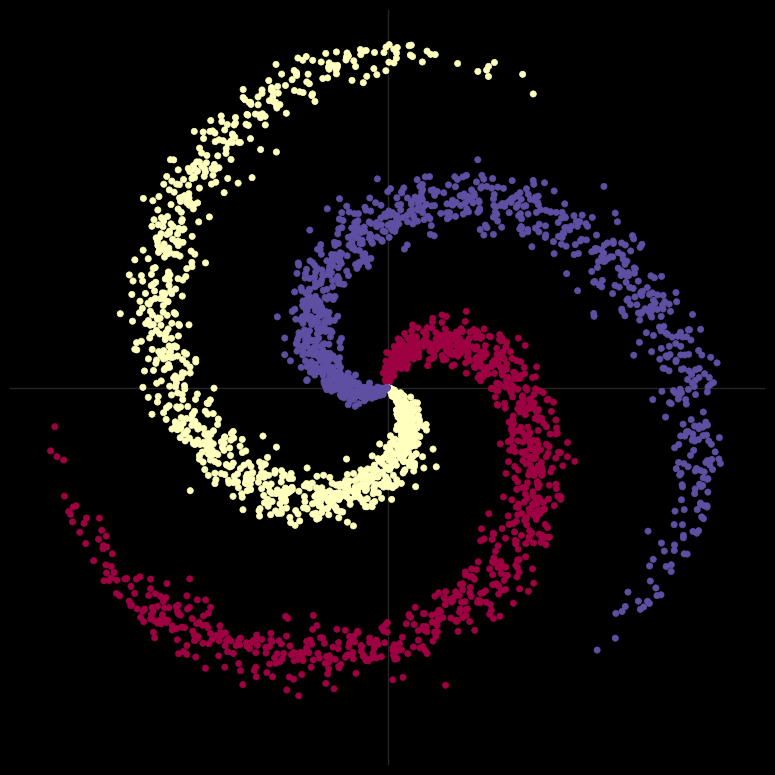

In [101]:
# visualise the data using the plot_data function provided as a helper function
plot_data(X, y)

### Linear Model
We now define a linear classification model using PyTorch and train it using stochastic gradient descent with the help of the autograd package. 

Initialize some hyper-parameter values, such as, learning rate, regularization coefficient etc

In [108]:
learning_rate = 1e-3
lambda_l2 = 1e-3 # coefficient for the L2 regularizer. You should play with its value to see the effect of regularization

Create the linear model and print it

In [113]:
# nn package to create our linear model. Notice the Sequential container class. 
# Each Linear module has a weight and bias
# The order in which the Linear modules are defined is important as it creates the directed acyclic graph
model = nn.Sequential(
    nn.Linear(D, H),
    nn.Linear(H, C)
).to(device)

In [114]:
# Print the model
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): Linear(in_features=100, out_features=3, bias=True)
)


Create the training loop and print the metrics (loss and accuracy) at the end of each iteration

In [115]:
# nn package has a variety of loss functions already implemented
# we use cross entropy loss for our classification task
criterion = torch.nn.CrossEntropyLoss()

# nn package also has a variety of optimization algorithms implemented
# we use the stochastic gradient descent for our parameter updates
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

# Training loop
for t in range(1000):
    
    # Forward pass over the model to get the logits 
    y_pred = model(X)
    
    # Compute the loss and accuracy
    loss = criterion(y_pred, y)
    score, predicted = torch.max(y_pred, 1)
    acc = (y == predicted).sum().float() / len(y)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)
    
    # reset (zero) the gradients before running the backward pass over the model
    # we need to do this because the gradients get accumulated at the same place across iterations
    optimizer.zero_grad()
    
    # Backward pass to compute the gradient of loss w.r.t our learnable params (weights and biases)
    loss.backward()
    
    # Update params
    optimizer.step()

[EPOCH]: 999, [LOSS]: 0.855939, [ACCURACY]: 0.514


Plot the output of the model (in this case a collection of hyper-planes)

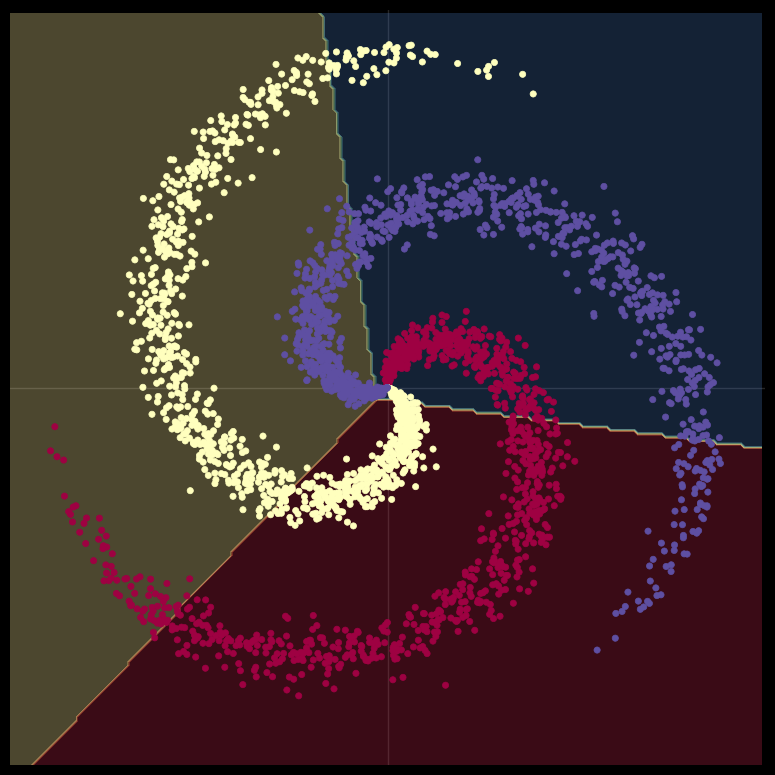

In [116]:
# Plot trained model
plot_model(X, y, model)

### Two layer neural network
We now define a two layer (single hidden layer) neural network model using PyTorch and train it using stochastic gradient descent with the help of the autograd package. 

Initialize the hyper-parameters like before. Play around with the learning rate and the regularization parameter to see their effect on the optimization. 

In [117]:
learning_rate = 1e-3
lambda_l2 = 1e-5

Create and print the two layer MLP with ReLU as the activation units

In [135]:
# nn package to create our linear model
# each Linear module has a weight and bias

model = nn.Sequential(
    nn.Linear(D, H),
    nn.ReLU(),
    nn.Linear(H, C)
).to(device)

# model = nn.Sequential(
#     nn.Linear(D, H),
#     nn.ReLU(),
#     nn.Linear(H, H),
#     nn.ReLU(),
#     nn.Linear(H, C)
# ).to(device)

print(model)

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
)


Create the training loop and print the metrics (loss and accuracy) at the end of each iteration

In [136]:
# nn package has a variety of loss functions already implemented
# we use cross entropy loss for our classification task
criterion = torch.nn.CrossEntropyLoss()

# nn package also has a variety of optimization algorithms implemented
# we use the stochastic gradient descent for our parameter updates
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

# e = 1.  # plotting purpose

# Training
for t in range(1000):
    
    # Forward pass over the model to get the logits
    y_pred = model(X)
    
    # Compute the loss and accuracy
    loss = criterion(y_pred, y)
    score, predicted = torch.max(y_pred, 1)
    acc = (y == predicted).sum().float() / len(y)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)
    
    # reset (zero) the gradients before running the backward pass over the model
    # we need to do this because the gradients get accumulated at the same place across iterations
    optimizer.zero_grad()
    
    # Backward pass to compute the gradient of loss w.r.t our learnable params (weights and biases)
    loss.backward()
    
    # Update params
    optimizer.step()

[EPOCH]: 999, [LOSS]: -0.000000, [ACCURACY]: 0.000


In [134]:
# Plot trained model
plot_model(X, y, model)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (48400x2 and 1x100)

## Regression

We will now demonstrate how to build a linear model and a neural network model for a regression task using PyTorch.  

In [123]:
import random
import torch
from torch import nn, optim
import math
from IPython import display
from plot_lib import plot_data, plot_model, set_default
from matplotlib import pyplot as plt

In [124]:
set_default()

### Create the data

In [125]:
seed = 1
random.seed(seed)
torch.manual_seed(seed)
N = 1000  # num_samples_per_class
D = 1  # dimensions
C = 1  # num_classes
H = 100  # num_hidden_units

In [126]:
X = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1).to(device)
y = X.pow(3) + 0.3 * torch.rand(X.size()).to(device)

In [127]:
print("Shapes:")
print("X:", tuple(X.size()))
print("y:", tuple(y.size()))

Shapes:
X: (100, 1)
y: (100, 1)


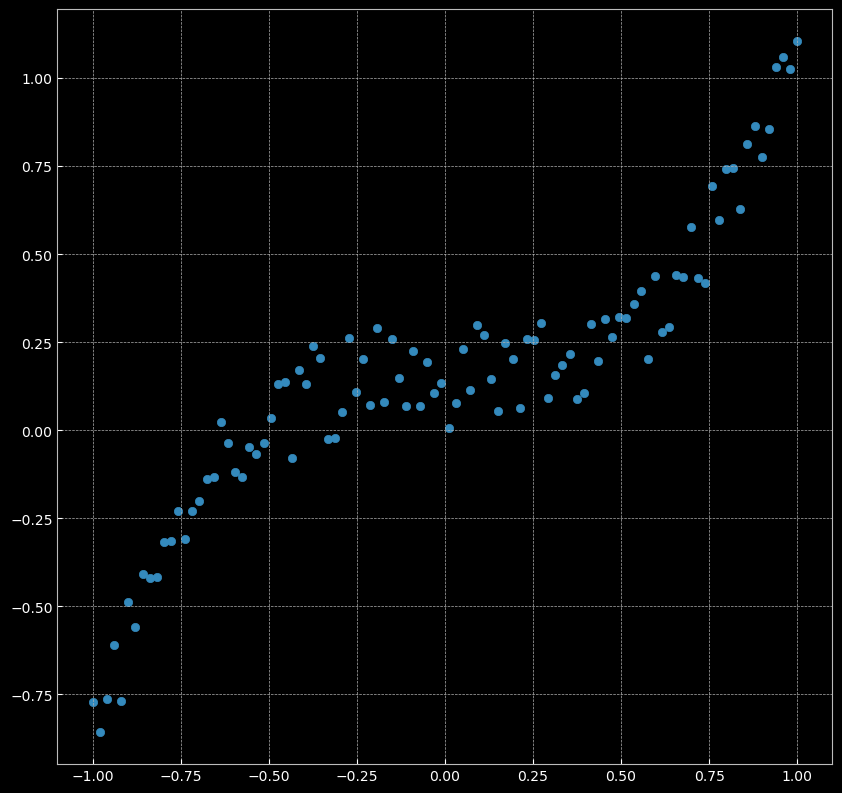

In [128]:
plt.scatter(X.cpu().numpy(), y.cpu().numpy())
plt.axis('equal');

### Linear model

Initialize the values of the hyper-parameters

In [129]:
learning_rate = 1e-3
lambda_l2 = 1e-5

Create the model and print it

In [137]:
# nn package to create our linear model
# each Linear module has a weight and bias
model = nn.Sequential(
    nn.Linear(D, H),
    nn.Linear(H, C)
).to(device)

# print the model
print(model)

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): Linear(in_features=100, out_features=1, bias=True)
)


Create the training loop

In [138]:
# we use MSE (mean squared error) loss from the nn package for our regression task
criterion = torch.nn.MSELoss()

# we use the optim package to apply stochastic gradient descent for our parameter updates
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

# Training loop
for t in range(1000):
    
    # forward pass over the model to get the logits (inputs to the loss function)
    y_pred = model(X)
    
    # Compute the loss (MSE)
    loss = criterion(y_pred, y)
    print("[EPOCH]: %i, [LOSS or MSE]: %.6f" % (t, loss.item()))
    display.clear_output(wait=True)
    
    # zero the gradients before running the backward pass
    optimizer.zero_grad()
    
    # Backward pass to compute the gradient of loss w.r.t our learnable params 
    loss.backward()
    
    # Update params
    optimizer.step()

[EPOCH]: 999, [LOSS or MSE]: 0.029701


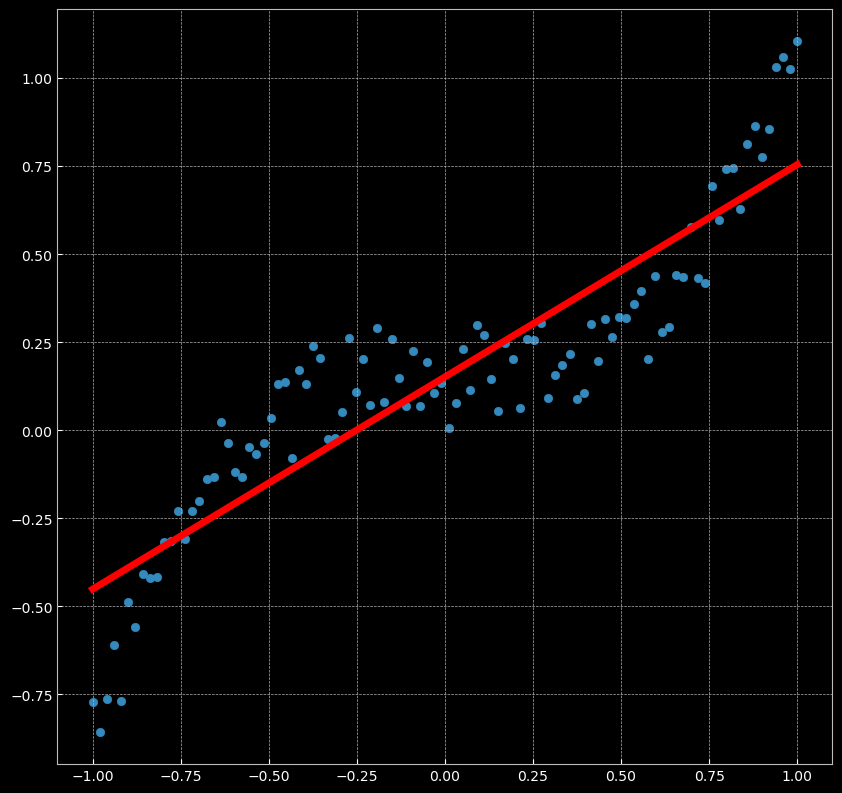

In [140]:
# Plot trained model
plt.scatter(X.data.cpu().numpy(), y.data.cpu().numpy())
plt.plot(X.data.cpu().numpy(), y_pred.data.cpu().numpy(), 'r-', lw=5)
plt.axis('equal');

Play around with the values of the hyper-parameters and the value of H (number of hidden units) to observe the change in the models being learnt

### Two-layered network
We now implement a two layer MLP for the regression task. We will built 10 seperate models, each with the same architecture but having different initial values of the parameters (weights and biases). This is to show the effect of local minima on model training. 

Initialize the hyper-parameters

In [141]:
learning_rate = 1e-3
lambda_l2 = 1e-5

Create the models. Half of the models have ReLU activations and the other half have TanH activations.

In [145]:
# Number of networks
n_networks = 10
models = list()
y_pretrain = list()

# nn package also has different loss functions.
# we use MSE for a regression task
criterion = torch.nn.MSELoss()

for mod in range(n_networks):
    # nn package to create our linear model
    # each Linear module has a weight and bias
    model = nn.Sequential(
        nn.Linear(D, H),
        nn.ReLU() if mod < n_networks // 2 else nn.Tanh(),
        nn.Linear(H, C)
    ).to(device)
    
    # Append models
    models.append(model)

Print the models

In [147]:
print(models[0], models[-1])

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
) Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): Tanh()
  (2): Linear(in_features=100, out_features=1, bias=True)
)


Create the training loop over the 10 models

In [148]:
for mod in range(n_networks):
    # select the i-th model
    model = models[mod]
    
    # while we could simply use the stochastic gradient descent optimized, we will use the ADAM optimizer
    # because of its robustness and speed
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

    # Training loop
    for t in range(1000):

        # Feed forward to get the logits
        y_pred = model(X)
        
        # Append pre-train output
        if t == 0:
            y_pretrain.append(y_pred.detach())

        # Compute the loss and accuracy
        loss = criterion(y_pred, y)
        print(f"[MODEL]: {mod + 1}, [EPOCH]: {t}, [LOSS]: {loss.item():.6f}")
        display.clear_output(wait=True)

        # zero the gradients before running
        # the backward pass.
        optimizer.zero_grad()

        # Backward pass to compute the gradient
        # of loss w.r.t our learnable params. 
        loss.backward()

        # Update params
        optimizer.step()

[MODEL]: 10, [EPOCH]: 999, [LOSS]: 0.011010


### Predictions: Before Training
Show the model predictions before training

In [ ]:
for y_pretrain_idx in y_pretrain:
    # New X that ranges from -5 to 5 instead of -1 to 1
    X_new = torch.unsqueeze(torch.linspace(-2, 2, 100), dim=1)
        
    plt.plot(X_new.numpy(), y_pretrain_idx.cpu().numpy(), 'r-', lw=1)

plt.scatter(X.cpu().numpy(), y.cpu().numpy(), label='data')
plt.axis('square')
plt.axis((-1.1, 1.1, -1.1, 1.1));
y_combo = torch.stack(y_pretrain)
plt.plot(X_new.numpy(), y_combo.var(dim=0).cpu().numpy(), 'g', label='variance');
plt.legend()

## Predictions: After Training

In [ ]:
y_pred = list()
relu_models = models[:n_networks // 2]
tanh_models = models[n_networks // 2:]
plt.figure(figsize=(20, 10))

def dense_prediction(models, non_linearity, zoom):
    plt.subplot(1, 2, 1 if non_linearity == 'ReLU' else 2)
    for model in models:
        # New X that ranges from -5 to 5 instead of -1 to 1
        X_new = torch.unsqueeze(torch.linspace(-4, 4, 1001), dim=1).to(device)

        # Getting predictions from input
        with torch.no_grad():
            y_pred.append(model(X_new))

        plt.plot(X_new.cpu().numpy(), y_pred[-1].cpu().numpy(), 'r-', lw=1)
    plt.scatter(X.cpu().numpy(), y.cpu().numpy(), label='data')
    plt.axis('square')
    plt.axis(torch.tensor((-1.1, 1.1, -1.1, 1.1)) * zoom);
    y_combo = torch.stack(y_pred)
    plt.plot(X_new.cpu().numpy(), 10 * y_combo.var(dim=0).cpu().sqrt().numpy(), 'y', label='10 × std')
    plt.plot(X_new.cpu().numpy(), 10 * y_combo.var(dim=0).cpu().numpy(), 'g', label='30 × variance')
    plt.legend()
    plt.title(non_linearity + ' models')

z = 1  # try 1 or 4
dense_prediction(relu_models, 'ReLU', zoom=z)
dense_prediction(tanh_models, 'Tanh', zoom=z)